In [2]:
# 1) Imports y setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Carpetas
DATA_PATH = "C:/Users/lmosquen/Desktop/Python/Ciencia de datos/Día 9/Data/Top-Películas.csv"
IMG_DIR   = "C:/Users/lmosquen/Desktop/Python/Ciencia de datos/Día 9/Images"
os.makedirs(IMG_DIR, exist_ok=True)

# Estética básica
plt.style.use("default")
plt.rcParams["figure.figsize"] = (10, 6)


In [3]:
# 2) Carga y limpieza mínima
df = pd.read_csv(DATA_PATH)

# Forzar numéricos de forma segura
num_cols = ["año", "duración", "rating", "metascore", "recaudación(M)"]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Quitar duplicados (mismo título + año + director)
df = df.drop_duplicates(subset=["título", "año", "director"], keep="first").reset_index(drop=True)

# Crear columna década (solo si 'año' no es NaN)
df["década"] = (df["año"] // 10 * 10).astype("Int64")
df.head()


,indice_global,indice_estricto,título,director,año,duración,género,rating,metascore,recaudación(M),década
0,0,0.0,The Shawshank Redemption,Frank Darabont,1994.0,142.0,Drama,9.3,82.0,28.34,1990
1,1,1.0,The Godfather,Francis Ford Coppola,1972.0,175.0,Crimen,9.2,100.0,134.97,1970
2,3,2.0,The Dark Knight,Christopher Nolan,2008.0,152.0,Acción,9.0,84.0,534.86,2000
3,6,3.0,Schindler's List,Steven Spielberg,1993.0,195.0,Biografía,9.0,95.0,96.90,1990
4,9,4.0,12 Angry Men,Sidney Lumet,1957.0,96.0,Crimen,9.0,97.0,4.36,1950


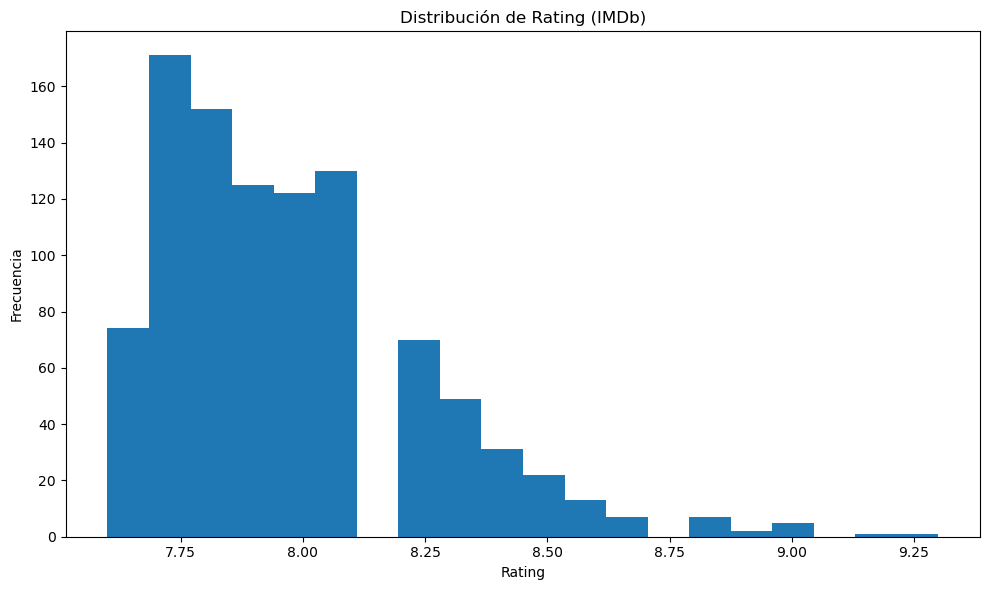

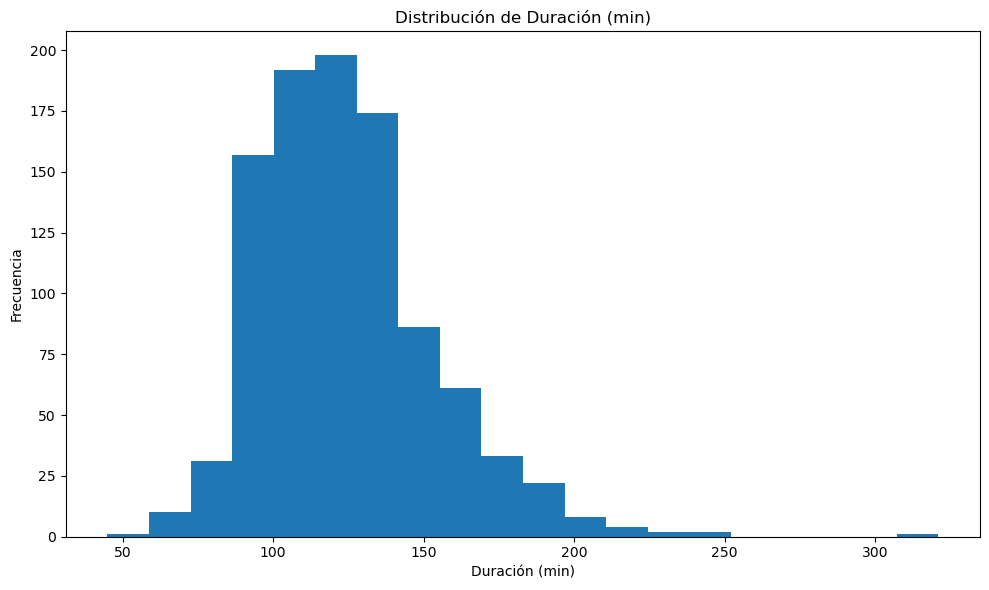

In [4]:
# 3) Distribuciones: Rating y Duración
fig, ax = plt.subplots()
ax.hist(df["rating"].dropna(), bins=20)
ax.set_title("Distribución de Rating (IMDb)")
ax.set_xlabel("Rating")
ax.set_ylabel("Frecuencia")
plt.tight_layout()
plt.savefig(f"{IMG_DIR}/dist_rating.png", dpi=300, bbox_inches="tight")
plt.show()

fig, ax = plt.subplots()
ax.hist(df["duración"].dropna(), bins=20)
ax.set_title("Distribución de Duración (min)")
ax.set_xlabel("Duración (min)")
ax.set_ylabel("Frecuencia")
plt.tight_layout()
plt.savefig(f"{IMG_DIR}/dist_duracion.png", dpi=300, bbox_inches="tight")
plt.show()


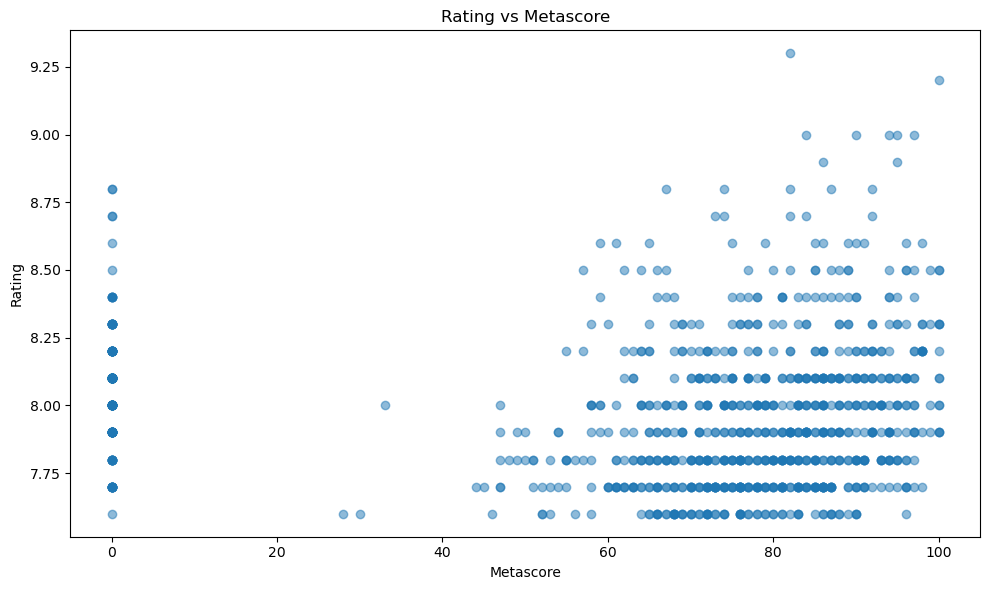

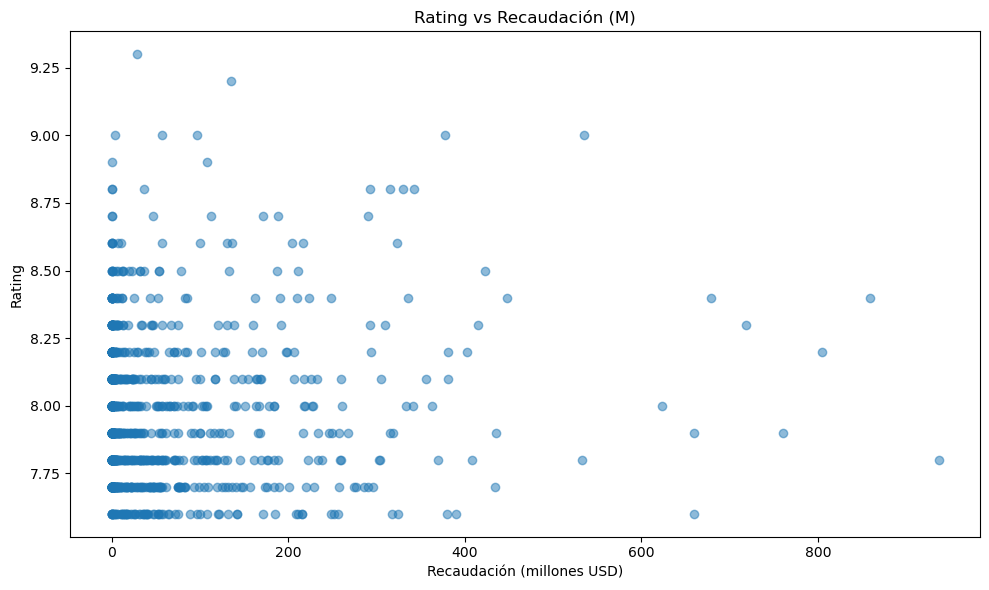

In [5]:
# 4) Relaciones: rating vs metascore / rating vs recaudación
# Rating vs Metascore
fig, ax = plt.subplots()
x = df["metascore"]
y = df["rating"]
ax.scatter(x, y, alpha=0.5)
ax.set_title("Rating vs Metascore")
ax.set_xlabel("Metascore")
ax.set_ylabel("Rating")
plt.tight_layout()
plt.savefig(f"{IMG_DIR}/scatter_rating_metascore.png", dpi=300, bbox_inches="tight")
plt.show()

# Rating vs Recaudación
fig, ax = plt.subplots()
x = df["recaudación(M)"]
y = df["rating"]
ax.scatter(x, y, alpha=0.5)
ax.set_title("Rating vs Recaudación (M)")
ax.set_xlabel("Recaudación (millones USD)")
ax.set_ylabel("Rating")
plt.tight_layout()
plt.savefig(f"{IMG_DIR}/scatter_rating_recaudacion.png", dpi=300, bbox_inches="tight")
plt.show()


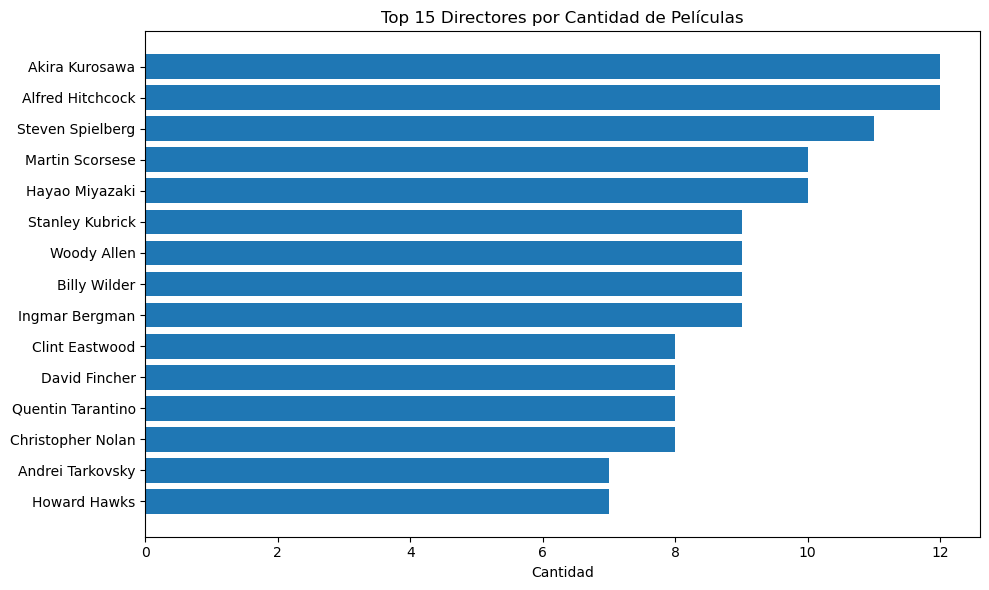

In [6]:
# 5) Comparaciones: Top directores por cantidad de películas (Top 15)
top_dir = df["director"].value_counts().head(15).sort_values(ascending=True)

fig, ax = plt.subplots()
ax.barh(top_dir.index, top_dir.values)
ax.set_title("Top 15 Directores por Cantidad de Películas")
ax.set_xlabel("Cantidad")
plt.tight_layout()
plt.savefig(f"{IMG_DIR}/top_directores.png", dpi=300, bbox_inches="tight")
plt.show()


C:\Users\lmosquen\AppData\Local\Temp\ipykernel_9896\108383515.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_box, labels=top_gen, showfliers=False)


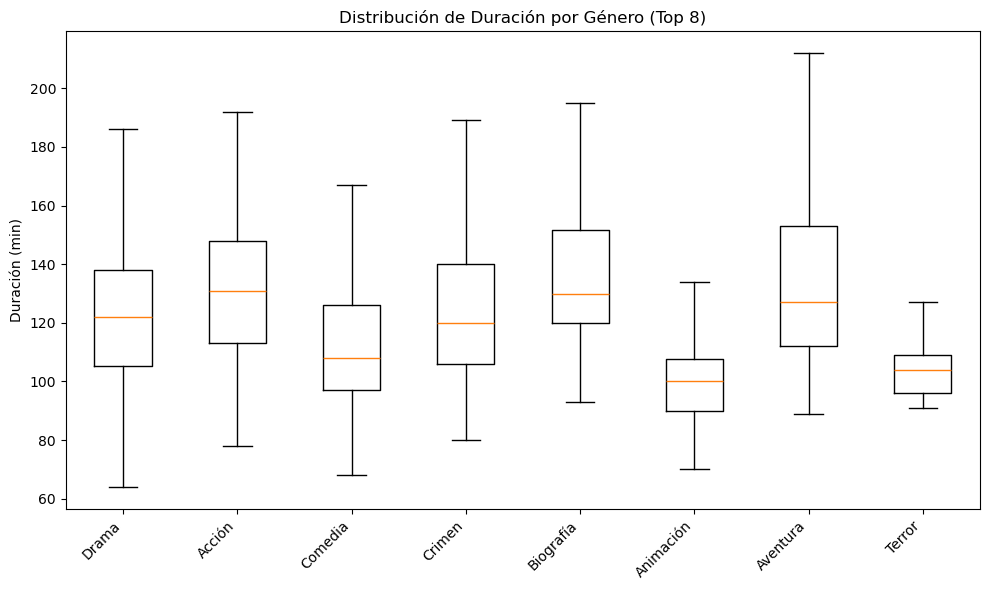

In [7]:
# 6) Boxplot de Duración por Género (Top 8 géneros por cantidad)
top_gen = df["género"].value_counts().head(8).index
df_gen = df[df["género"].isin(top_gen)]

# Preparar datos para boxplot en el orden de frecuencia
data_box = [df_gen.loc[df_gen["género"] == g, "duración"].dropna() for g in top_gen]

fig, ax = plt.subplots()
ax.boxplot(data_box, labels=top_gen, showfliers=False)
ax.set_title("Distribución de Duración por Género (Top 8)")
ax.set_ylabel("Duración (min)")
plt.xticks(rotation=45, ha="right")  # Rotación 45°
plt.tight_layout()
plt.savefig(f"{IMG_DIR}/boxplot_duracion_genero.png", dpi=300, bbox_inches="tight")
plt.show()


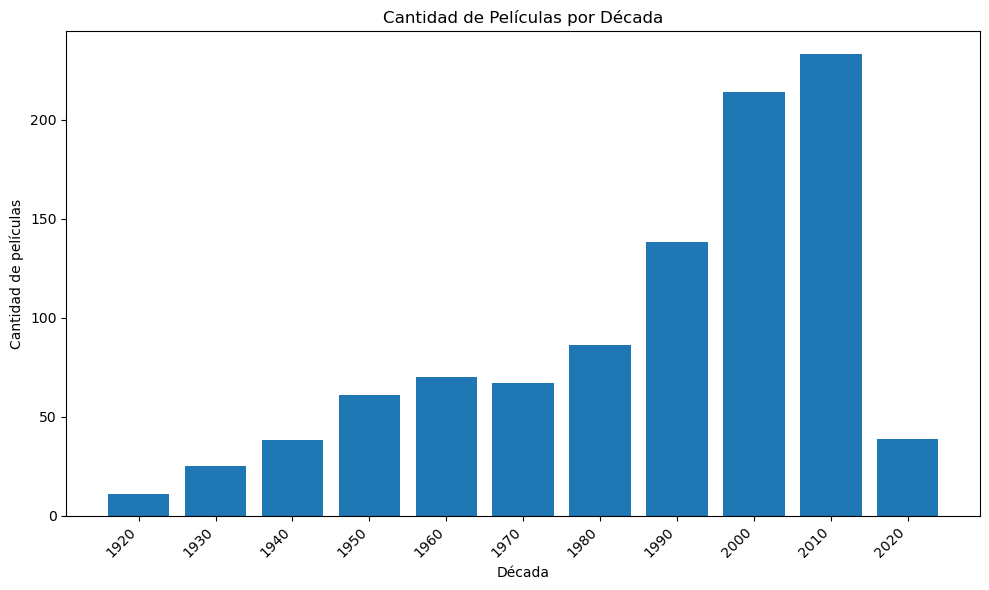

In [8]:
# 7) Tendencias: Películas por década
dec_count = df["década"].dropna().value_counts().sort_index()

fig, ax = plt.subplots()
ax.bar(dec_count.index.astype(int).astype(str), dec_count.values)
ax.set_title("Cantidad de Películas por Década")
ax.set_xlabel("Década")
ax.set_ylabel("Cantidad de películas")
plt.xticks(rotation=45, ha="right")  # Rotación 45°
plt.tight_layout()
plt.savefig(f"{IMG_DIR}/peliculas_por_decada.png", dpi=300, bbox_inches="tight")
plt.show()


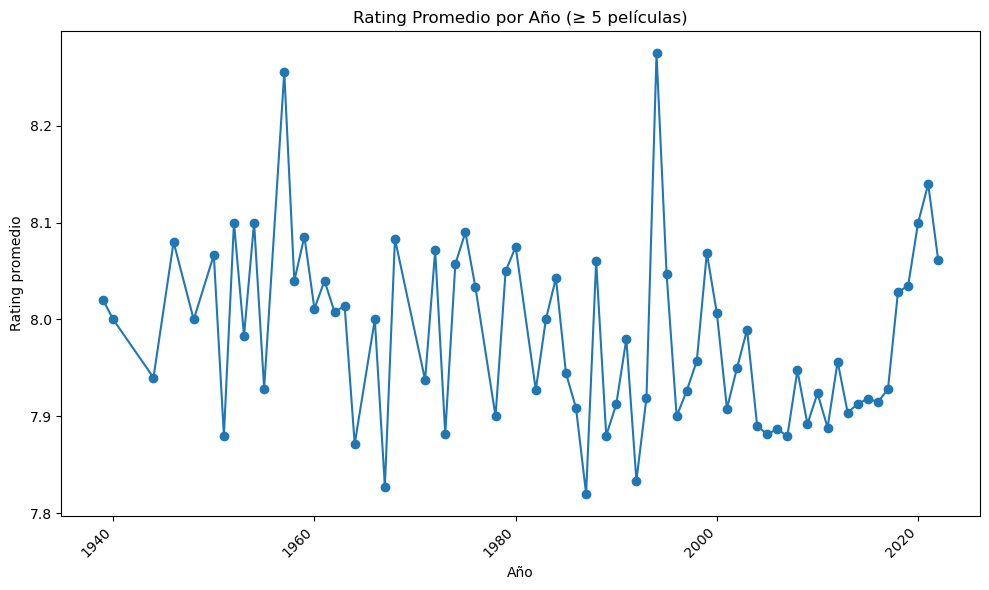

In [9]:
# 8) Tendencias: Rating promedio por año (filtrando años con al menos 5 películas)
agg_year = (df.dropna(subset=["año"])
              .groupby("año")
              .agg(n=("título", "count"), rating_mean=("rating", "mean"))
              .reset_index())
agg_year = agg_year[agg_year["n"] >= 5].sort_values("año")

fig, ax = plt.subplots()
ax.plot(agg_year["año"], agg_year["rating_mean"], marker="o")
ax.set_title("Rating Promedio por Año (≥ 5 películas)")
ax.set_xlabel("Año")
ax.set_ylabel("Rating promedio")
plt.xticks(rotation=45, ha="right")  # Rotación 45°
plt.tight_layout()
plt.savefig(f"{IMG_DIR}/rating_promedio_por_anio.png", dpi=300, bbox_inches="tight")
plt.show()


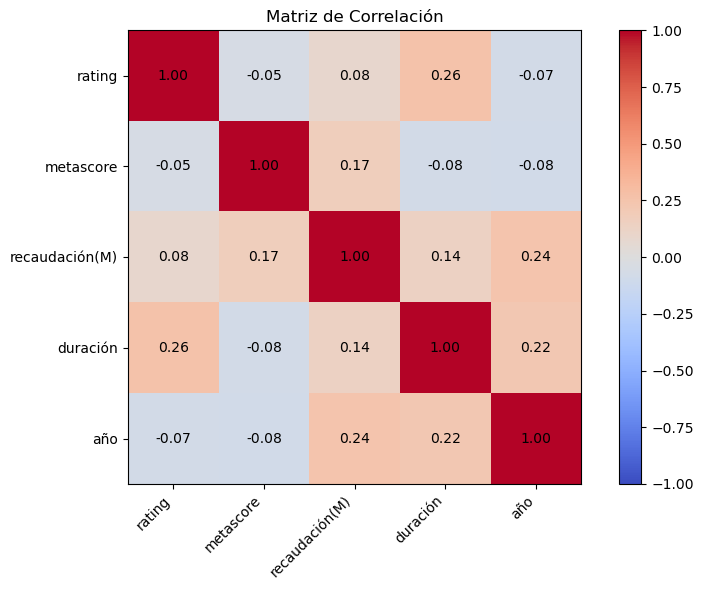

In [10]:
# 9) Heatmap de correlaciones usando matplotlib
corr_cols = ["rating", "metascore", "recaudación(M)", "duración", "año"]
corr = df[corr_cols].corr()

fig, ax = plt.subplots()
im = ax.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
ax.set_title("Matriz de Correlación")
ax.set_xticks(range(len(corr_cols)))
ax.set_yticks(range(len(corr_cols)))
ax.set_xticklabels(corr_cols, rotation=45, ha="right")
ax.set_yticklabels(corr_cols)
# Anotar valores
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", color="black")
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.savefig(f"{IMG_DIR}/heatmap_correlaciones.png", dpi=300, bbox_inches="tight")
plt.show()
